# Atomic Structure and Electron Configuration: A Julia Exploration

## Learning Objectives

By the end of this notebook, you will:

- Understand the fundamental structure of atoms and quantum mechanical principles
- Calculate and visualize hydrogen atom energy levels using the Bohr model
- Explore periodic trends using Julia's computational capabilities
- Apply quantum numbers to describe electron configurations

## Prerequisites

- Basic chemistry knowledge
- Familiarity with Julia syntax
- Understanding of energy and basic physics concepts



## Historical Context: From Democritus to Quantum Mechanics

The concept of atoms dates back to ancient Greek philosopher Democritus (460-370 BCE), who proposed that matter consisted of indivisible particles called "atomos." However, modern atomic theory began with John Dalton in 1803, followed by crucial discoveries:

- **1897**: J.J. Thomson discovered electrons using cathode ray tubes
- **1909**: Ernest Rutherford's gold foil experiment revealed the atomic nucleus
- **1913**: Niels Bohr proposed his planetary model with quantized energy levels
- **1926**: Erwin Schrödinger developed wave mechanics, founding modern quantum theory

Today's atomic model combines these insights into a probabilistic quantum mechanical framework essential for understanding chemistry, physics, and materials science.

In [10]:
# Import required Julia packages
import Pkg; Pkg.add("LaTeXStrings")

using Plots
using LaTeXStrings
using Printf

# Set up plotting defaults for better visualization
gr()
default(titlefont = (10, "Computer Modern"), 
        guidefont = (9, "Computer Modern"), 
        tickfont = (8, "Computer Modern"), 
        legendfont = (8, "Computer Modern"))

println("Julia environment initialized for atomic structure calculations")

   Resolving package versions...


  No Changes to `~/.julia/environment/v1.11/Project.toml`
  No Changes to `~/.julia/environment/v1.11/Manifest.toml`


Julia environment initialized for atomic structure calculations


## The Bohr Model: Quantized Energy Levels

In 1913, Niels Bohr revolutionized atomic physics by proposing that electrons orbit the nucleus in discrete energy levels. For hydrogen, the energy of an electron in the nth orbit is:

$$E_n = -\frac{13.6 \text{ eV}}{n^2}$$

Where:
- $E_n$ = energy of the electron in the nth energy level (in electron volts)
- $n$ = principal quantum number (1, 2, 3, ...)
- 13.6 eV = Rydberg constant for hydrogen

This equation explains hydrogen's discrete emission spectrum, a phenomenon classical physics couldn't explain.

In [3]:
# Define the Rydberg constant for hydrogen
RYDBERG_CONSTANT = 13.6  # eV

# Function to calculate hydrogen energy levels
function hydrogen_energy(n::Int)
    """Calculate the energy of hydrogen electron at level n"""
    return -RYDBERG_CONSTANT / n^2
end

# Calculate first 6 energy levels
n_levels = 1:6
energies = [hydrogen_energy(n) for n in n_levels]

# Display results with formatting
println("\nHydrogen Energy Levels:")
println("="^40)
for (n, E) in zip(n_levels, energies)
    @printf("n = %d: E = %6.2f eV\n", n, E)
end


Hydrogen Energy Levels:


n = 1: E = -13.60 eV
n = 2: E =  -3.40 eV


n = 3: E =  -1.51 eV
n = 4: E =  -0.85 eV
n = 5: E =  -0.54 eV
n = 6: E =  -0.38 eV


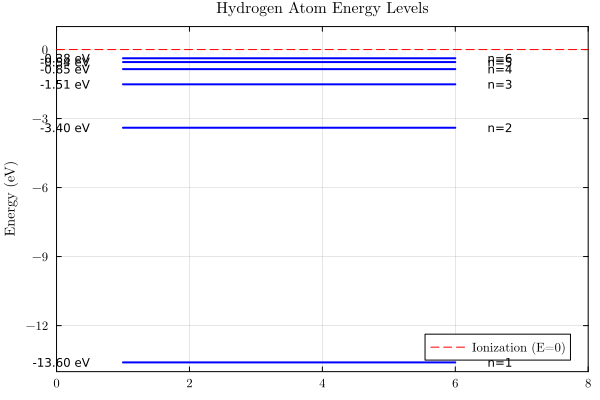

In [4]:
# Visualize energy levels with an energy level diagram
plot(xlims=(0, 8), ylims=(-14, 1), 
     xlabel="", ylabel="Energy (eV)",
     title="Hydrogen Atom Energy Levels",
     grid=true, framestyle=:box)

# Draw energy levels as horizontal lines
for (n, E) in zip(n_levels, energies)
    plot!([1, 6], [E, E], color=:blue, linewidth=2, label="")
    annotate!(6.5, E, text("n=$n", 8, :left))
    annotate!(0.5, E, text(@sprintf("%.2f eV", E), 8, :right))
end

# Add reference line at E=0 (ionization threshold)
hline!([0], color=:red, linestyle=:dash, linewidth=1, label="Ionization (E=0)")

## Electron Transitions and Spectral Lines

When an electron transitions between energy levels, it absorbs or emits a photon with energy equal to the difference between levels:

$$\Delta E = E_{final} - E_{initial} = h\nu = \frac{hc}{\lambda}$$

Where:
- $h$ = Planck's constant (6.626 × 10⁻³⁴ J·s)
- $\nu$ = frequency of the photon
- $c$ = speed of light (3 × 10⁸ m/s)
- $\lambda$ = wavelength of the photon

This explains the characteristic line spectra of elements, used in spectroscopy for chemical analysis.

In [5]:
# Calculate transition energies for Balmer series (transitions to n=2)
function balmer_transition(n_initial::Int)
    """Calculate energy and wavelength for Balmer series transition"""
    n_final = 2
    E_initial = hydrogen_energy(n_initial)
    E_final = hydrogen_energy(n_final)
    ΔE = E_initial - E_final  # Energy released (positive value)
    
    # Convert to wavelength (nm)
    # λ = hc/E where hc = 1240 eV·nm
    λ = 1240 / ΔE  # wavelength in nm
    
    return ΔE, λ
end

# Calculate Balmer series lines
println("\nBalmer Series (Visible Light):")
println("="^50)
println("Transition   Energy (eV)   Wavelength (nm)   Color")
println("-"^50)

colors = ["Red", "Blue-green", "Blue", "Violet"]
for (i, n) in enumerate(3:6)
    ΔE, λ = balmer_transition(n)
    @printf("n=%d → n=2    %6.2f        %6.1f         %s\n", 
            n, ΔE, λ, colors[i])
end


Balmer Series (Visible Light):
Transition   Energy (eV)   Wavelength (nm)   Color
--------------------------------------------------
n=3 → n=2      1.89         656.5         Red
n=4 → n=2      2.55         486.3         Blue-green


n=5 → n=2      2.86         434.2         Blue
n=6 → n=2      3.02         410.3         Violet


## Quantum Numbers and Electron Configuration

Modern quantum mechanics describes electrons using four quantum numbers:

1. **Principal quantum number (n)**: Energy level (1, 2, 3, ...)
2. **Azimuthal quantum number (ℓ)**: Orbital shape (0 to n-1)
   - ℓ = 0 (s orbital): spherical
   - ℓ = 1 (p orbital): dumbbell-shaped
   - ℓ = 2 (d orbital): cloverleaf
   - ℓ = 3 (f orbital): complex shapes
3. **Magnetic quantum number (mₗ)**: Orbital orientation (-ℓ to +ℓ)
4. **Spin quantum number (mₛ)**: Electron spin (+½ or -½)

These quantum numbers arise from solving the Schrödinger wave equation and explain the periodic table's structure.

In [6]:
# Generate electron configurations for first 20 elements
function generate_electron_config(Z::Int)
    """Generate electron configuration for element with atomic number Z"""
    
    # Order of orbital filling (Aufbau principle)
    orbitals = [("1s", 2), ("2s", 2), ("2p", 6), ("3s", 2), 
                ("3p", 6), ("4s", 2), ("3d", 10), ("4p", 6)]
    
    config = []
    remaining_electrons = Z
    
    for (orbital, max_electrons) in orbitals
        if remaining_electrons == 0
            break
        end
        
        electrons_in_orbital = min(remaining_electrons, max_electrons)
        push!(config, "$orbital^$electrons_in_orbital")
        remaining_electrons -= electrons_in_orbital
    end
    
    return join(config, " ")
end

# Element data
elements = [(1, "H", "Hydrogen"), (2, "He", "Helium"), 
            (6, "C", "Carbon"), (8, "O", "Oxygen"),
            (11, "Na", "Sodium"), (17, "Cl", "Chlorine"),
            (20, "Ca", "Calcium")]

println("\nElectron Configurations:")
println("="^60)
for (Z, symbol, name) in elements
    config = generate_electron_config(Z)
    @printf("%2s (%-8s): %s\n", symbol, name, config)
end


Electron Configurations:
 H (Hydrogen): 1s^1
He (Helium  ): 1s^2


 C (Carbon  ): 1s^2 2s^2 2p^2
 O (Oxygen  ): 1s^2 2s^2 2p^4
Na (Sodium  ): 1s^2 2s^2 2p^6 3s^1
Cl (Chlorine): 1s^2 2s^2 2p^6 3s^2 3p^5
Ca (Calcium ): 1s^2 2s^2 2p^6 3s^2 3p^6 4s^2


## Periodic Trends: Understanding Chemical Properties

The periodic table's structure reflects electron configurations, leading to predictable trends:

1. **Atomic Radius**: Decreases across periods (increasing nuclear charge), increases down groups (additional electron shells)
2. **Ionization Energy**: Energy required to remove an electron; increases across periods, decreases down groups
3. **Electronegativity**: Atom's ability to attract electrons; follows ionization energy trend

These trends explain chemical reactivity and bonding behavior.

In [1]:
# Periodic table data for first 20 elements
periodic_data = [
    # (Z, Symbol, Radius(pm), IE(kJ/mol), EN(Pauling))
    (1, "H", 37, 1312, 2.20),
    (2, "He", 32, 2372, NaN),  # Noble gas - no EN
    (3, "Li", 152, 520, 0.98),
    (4, "Be", 112, 899, 1.57),
    (5, "B", 85, 801, 2.04),
    (6, "C", 77, 1086, 2.55),
    (7, "N", 75, 1402, 3.04),
    (8, "O", 73, 1314, 3.44),
    (9, "F", 72, 1681, 3.98),
    (10, "Ne", 71, 2081, NaN),
    (11, "Na", 186, 496, 0.93),
    (12, "Mg", 160, 738, 1.31),
    (13, "Al", 143, 578, 1.61),
    (14, "Si", 118, 787, 1.90),
    (15, "P", 110, 1012, 2.19),
    (16, "S", 103, 1000, 2.58),
    (17, "Cl", 100, 1251, 3.16),
    (18, "Ar", 98, 1521, NaN),
    (19, "K", 227, 419, 0.82),
    (20, "Ca", 197, 590, 1.00)
]

# Extract data for plotting
Z_values = [d[1] for d in periodic_data]
symbols = [d[2] for d in periodic_data]
radii = [d[3] for d in periodic_data]
IE = [d[4] for d in periodic_data]
EN = [d[5] for d in periodic_data]

20-element Vector{Float64}:
   2.2
 NaN
   0.98
   1.57
   2.04
   2.55
   3.04
   3.44
   3.98
 NaN
   0.93
   1.31
   1.61
   1.9
   2.19
   2.58
   3.16
 NaN
   0.82
   1.0

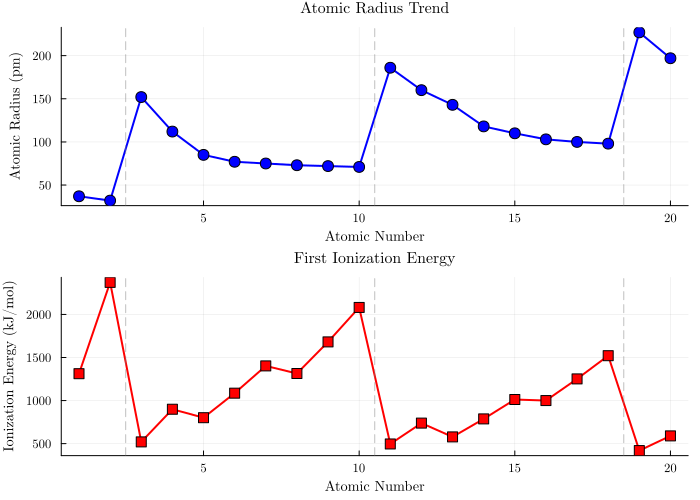

In [8]:
# Create subplots showing periodic trends
p1 = plot(Z_values, radii, 
          marker=:circle, markersize=6, linewidth=2,
          xlabel="Atomic Number", ylabel="Atomic Radius (pm)",
          title="Atomic Radius Trend", legend=false,
          color=:blue)

# Highlight periods
vline!([2.5, 10.5, 18.5], color=:gray, linestyle=:dash, alpha=0.5)

p2 = plot(Z_values, IE,
          marker=:square, markersize=5, linewidth=2,
          xlabel="Atomic Number", ylabel="Ionization Energy (kJ/mol)",
          title="First Ionization Energy", legend=false,
          color=:red)

vline!([2.5, 10.5, 18.5], color=:gray, linestyle=:dash, alpha=0.5)

# Combine plots
plot(p1, p2, layout=(2,1), size=(700, 500))

## Interactive Exploration: Orbital Visualization

While we can't fully visualize 3D orbitals here, we can understand their shapes mathematically. The s, p, d, and f orbitals have distinct angular dependencies that determine molecular geometry and chemical bonding.

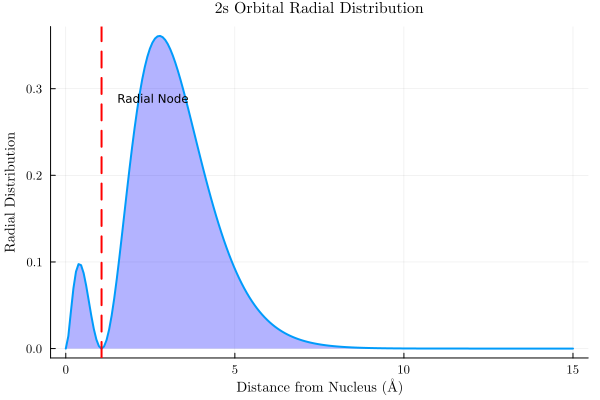

In [9]:
# Radial wave function for hydrogen-like atoms
function radial_wavefunction_2s(r, Z=1)
    """Calculate 2s orbital radial wave function"""
    a0 = 0.529  # Bohr radius in Angstroms
    ρ = Z * r / a0
    return (Z/a0)^(3/2) * (1/2√2) * (2 - ρ) * exp(-ρ/2)
end

# Plot radial distribution
r_values = range(0, 15, length=200)
ψ_2s = [radial_wavefunction_2s(r) for r in r_values]
radial_dist = @. r_values^2 * ψ_2s^2  # Radial distribution function

plot(r_values, radial_dist,
     xlabel="Distance from Nucleus (Å)",
     ylabel="Radial Distribution",
     title="2s Orbital Radial Distribution",
     linewidth=2, fill=(0, 0.3, :blue),
     legend=false)

# Mark the radial node
node_r = 2 * 0.529  # Node at r = 2a₀
vline!([node_r], color=:red, linestyle=:dash, linewidth=2)
annotate!(node_r + 0.5, maximum(radial_dist) * 0.8, 
          text("Radial Node", 8, :left))

## Applications in CoCalc

This notebook demonstrates how CoCalc's Julia environment enables:

1. **Real-time collaboration**: Multiple users can explore atomic structure concepts together
2. **Integrated visualization**: Plots update immediately as parameters change
3. **Educational flexibility**: Modify code to explore different elements or energy levels
4. **No setup required**: Julia and all packages pre-installed in CoCalc

## Exercises for Further Exploration

1. Calculate the wavelengths for the Lyman series (transitions to n=1)
2. Plot the periodic trend for electronegativity
3. Calculate the energy required to ionize hydrogen from n=2
4. Explore the radial distribution of 3s and 3p orbitals

## Summary

We've explored atomic structure from historical development through modern quantum mechanics, using Julia to:
- Calculate and visualize hydrogen energy levels
- Understand electron transitions and spectral lines
- Generate electron configurations
- Analyze periodic trends

These concepts form the foundation for understanding chemical bonding, molecular structure, and materials properties.